# 1. Business Understanding
## 1.1 Business Objectives

BO1: Accurately predict the cost of a trip (fare_amount) to improve customer transparency and fare planning.

BO2: Optimize Uber’s pricing strategy by incorporating passenger count, trip distance, and trip timing into prediction models.

## 1.2 Data Science Objectives

DSO1: Build and train a regression model to predict the target variable fare_amount.

DS02: Perform feature engineering to derive new variables, including hour of pickup, day of the week, and trip distance, to enrich the dataset and improve model performance.

DSO3: Apply clustering methods to group policyholders into homogeneous clusters.

DSO4: Build and train a classification model to predict the target variable fare_amount_label.

## 1.3 Current Situation

Uber has a dataset containing the following fields:

fare_amount (target variable),

pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude,

passenger_count,

key (unique identifier).

The project will be carried out in Jupyter Notebook using supervised machine learning techniques (linear regression, decision trees, gradient boosting, etc.), along with PCA for dimensionality reduction.

## 1.4 Success Criteria

Business: Improve the accuracy of fare prediction to support dynamic pricing and increase customer satisfaction.

Technical: Achieve low error metrics (RMSE, MAE) between predicted and actual fare values.

Data Quality: Detect and correct inconsistencies or outliers in geographical and temporal data.

Modeling: Ensure that PCA improves prediction performance and reduces noise in the dataset.

# 2. Data Understanding

In this step, we explore the dataset to understand its structure, data quality, and the relationships between variables.  
This includes: descriptive statistics, visualizations, anomaly detection, correlation analysis, and dimensionality reduction.


# 2.1 Import and Visualize the Data

In [213]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import joblib
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')



# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [149]:
# load the dataset
df = pd.read_csv("datauber.csv")

In [150]:
# Dataset Overview
print(df.shape)
df.head()

(44377, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199.0,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355.0,2009-08-24 21:45:00.00000061,12.9,NaN,-74.005043,40.740770,NaN,40.772647,1.0
3,25894730.0,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,NaN,-73.965316,40.803349,3.0
4,17610152.0,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,NaN,40.744085,-73.973082,NaN,5.0


## 2.2 Description of Variables

In [151]:
# Column Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44377 entries, 0 to 44376
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         42243 non-null  float64
 1   key                42143 non-null  object 
 2   fare_amount        42217 non-null  float64
 3   pickup_datetime    42094 non-null  object 
 4   pickup_longitude   42183 non-null  float64
 5   pickup_latitude    42130 non-null  float64
 6   dropoff_longitude  42183 non-null  float64
 7   dropoff_latitude   42119 non-null  float64
 8   passenger_count    42159 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.0+ MB


In [152]:
# Descriptive Statistics
df.describe(include="all")

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.224300e+04,42143,42217.000000,42094,42183.000000,42130.000000,42183.000000,42119.000000,42159.000000
unique,NaN,42040,NaN,41842,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-12-02 10:23:00.000000209,NaN,2009-11-30 11:12:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,2.767290e+07,NaN,11.409233,NaN,-72.568666,39.948790,-72.588555,39.957229,1.677720
std,1.602678e+07,NaN,10.091979,NaN,10.776933,6.006307,10.684628,5.962407,1.296484
min,4.800000e+01,NaN,0.000000,NaN,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,1.372484e+07,NaN,6.000000,NaN,-73.992075,40.734808,-73.991496,40.733766,1.000000
50%,2.765192e+07,NaN,8.500000,NaN,-73.981857,40.752503,-73.980170,40.752910,1.000000
75%,4.151020e+07,NaN,12.600000,NaN,-73.967187,40.767077,-73.963738,40.768162,2.000000


# 2.3 Missing Values and outliers

In [153]:
# Verifying messing values 
df.isnull().sum()

Unnamed: 0           2134
key                  2234
fare_amount          2160
pickup_datetime      2283
pickup_longitude     2194
pickup_latitude      2247
dropoff_longitude    2194
dropoff_latitude     2258
passenger_count      2218
dtype: int64

In [154]:
# Selection of numerical features 
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [155]:
# Remove the col ''Unnamed: 0'
num_df = num_df.drop(columns=['Unnamed: 0'])
num_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [156]:
# Calculate the IQR
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

# Detection of outliers using IQR
outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).sum()
outliers

fare_amount          3545
pickup_longitude     2913
pickup_latitude      1954
dropoff_longitude    3023
dropoff_latitude     2563
passenger_count      4659
dtype: int64

## 2.4 Descriptive Statistics and Distribution

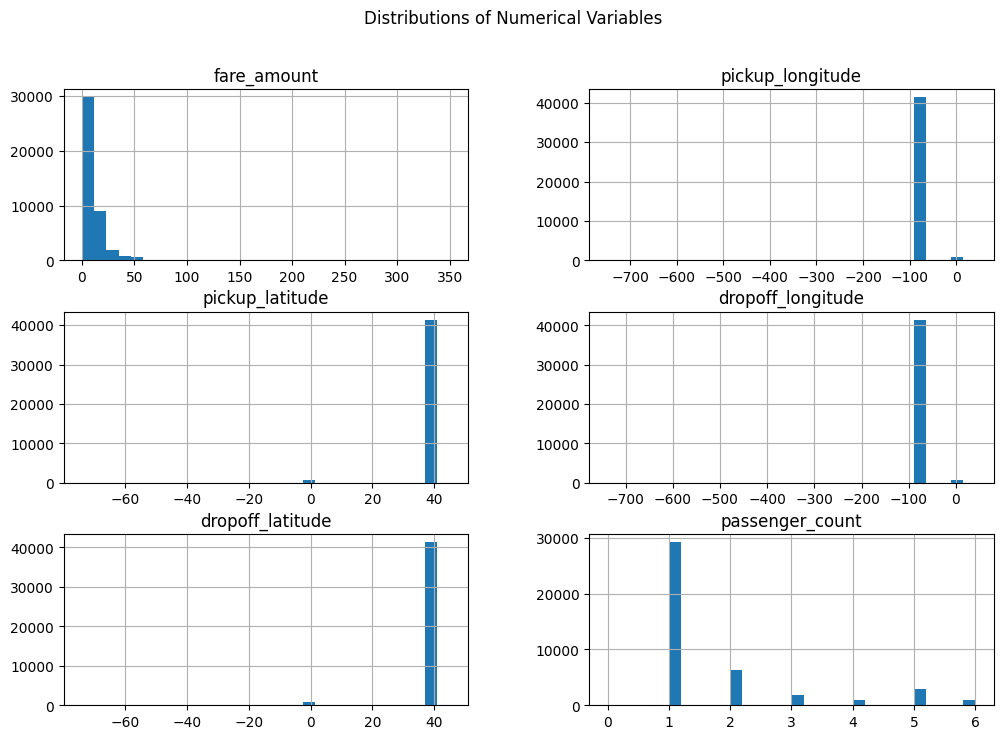

In [157]:
# Distribution of each numerical variable
num_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distributions of Numerical Variables")
plt.show()

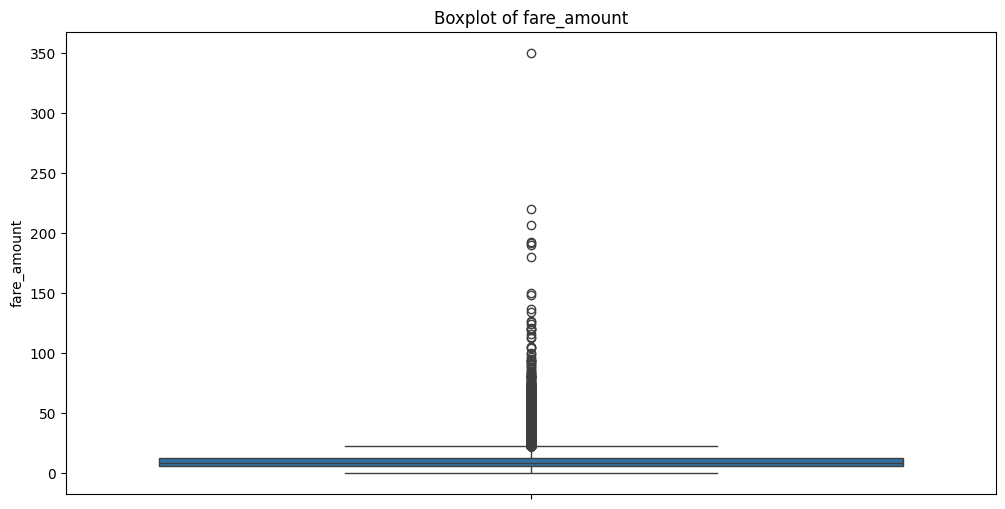

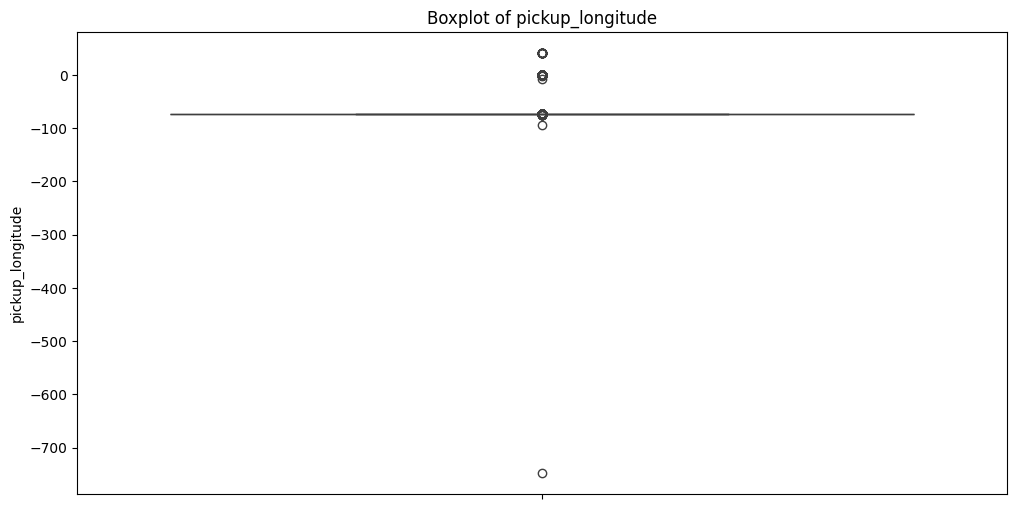

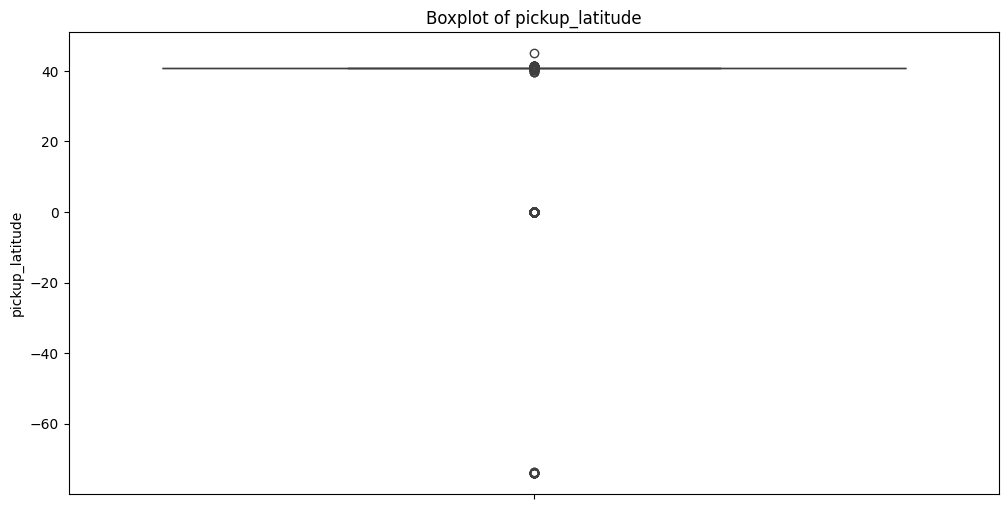

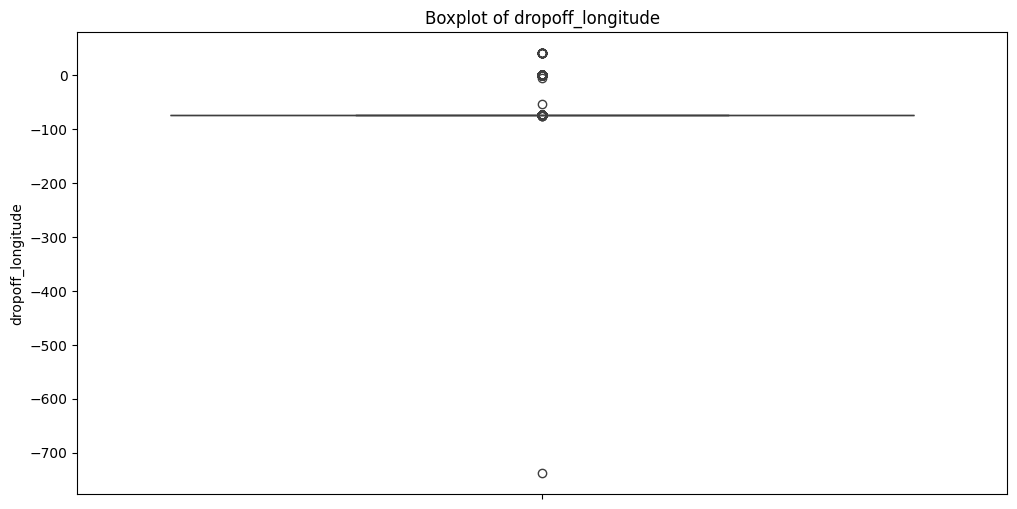

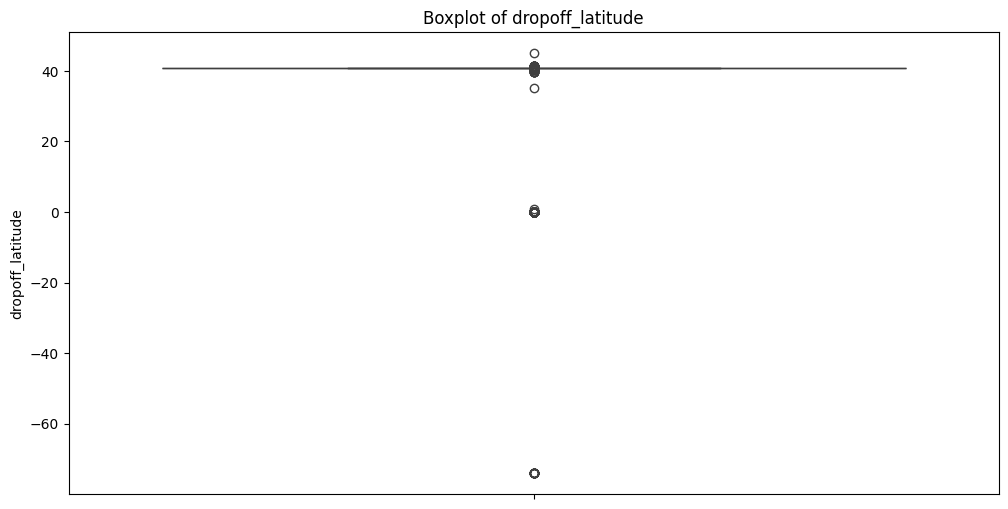

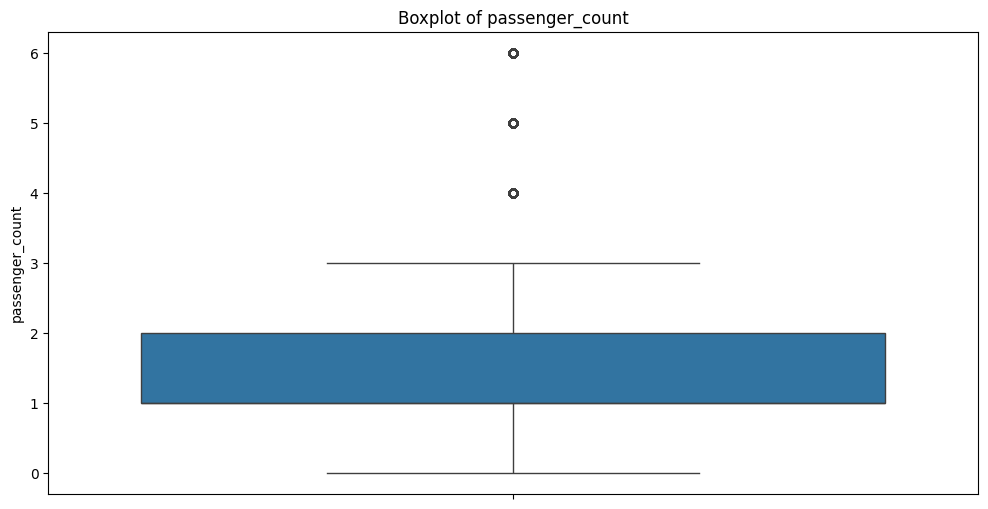

In [158]:
# Boxplots to visualize outliers
for col in num_df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=num_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 2.5 Univariate Analysis (by variable)

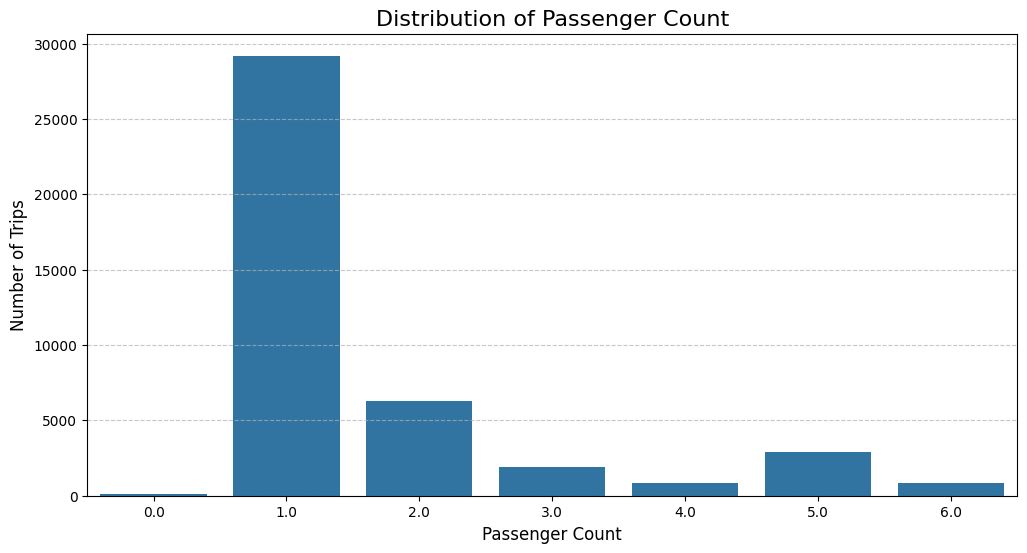

In [159]:
# Distribution of Passenger Count
plt.figure(figsize=(12,6))
sns.countplot(x=df['passenger_count'], color="#1f77b4")  # nice blue color
plt.title("Distribution of Passenger Count", fontsize=16)
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

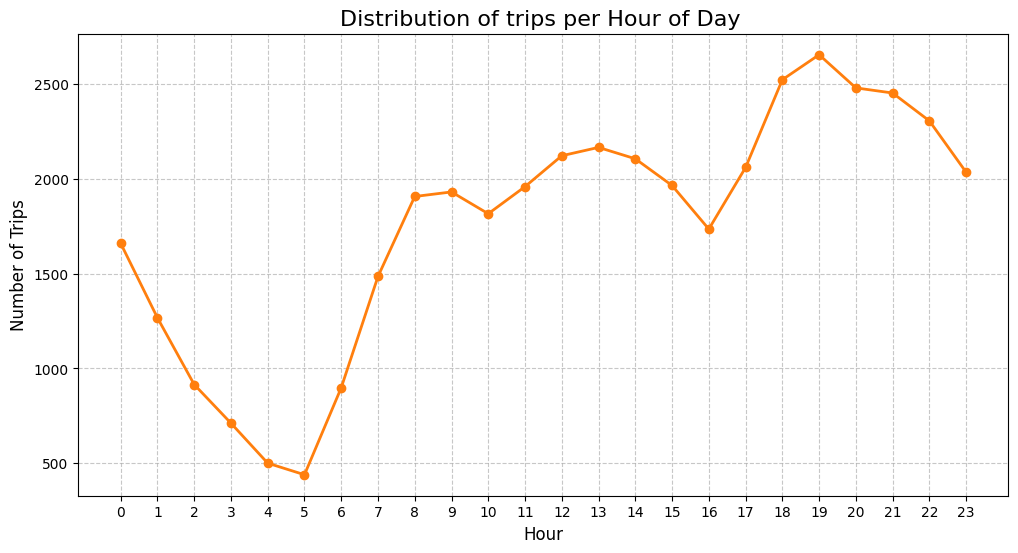

In [160]:
# Distribution of trips per Hour of Day 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df[df['pickup_datetime'].notna()]

trips_per_hour = df['pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o', color="#ff7f0e", linewidth=2)
plt.title("Distribution of trips per Hour of Day ", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

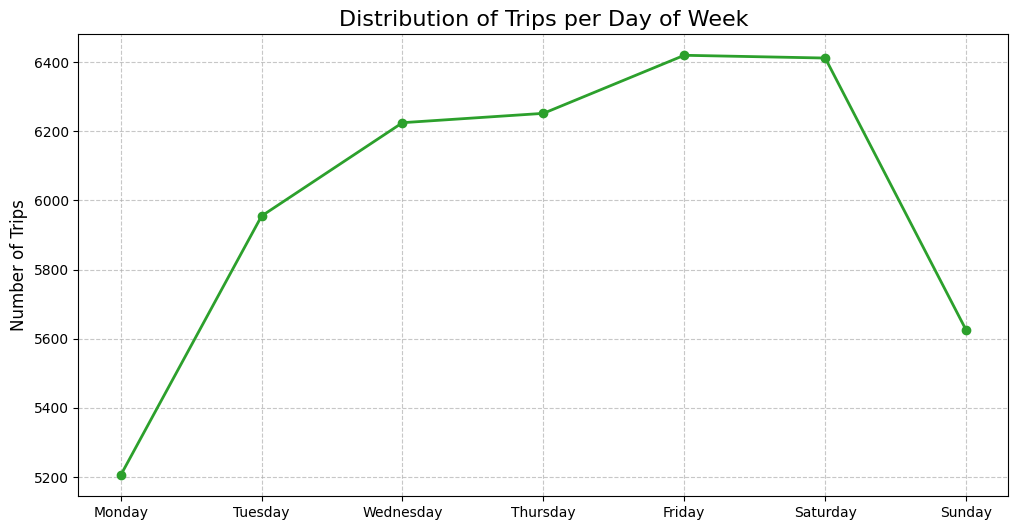

In [161]:
# Distribution of trips per Day of Week
trips_per_day = df['pickup_datetime'].dt.dayofweek.value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(trips_per_day.index, trips_per_day.values, marker='o', color="#2ca02c", linewidth=2)
plt.title("Distribution of Trips per Day of Week", fontsize=16)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(ticks=range(7), labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 2.6 Bivariate Analysis (Relationship with Target)

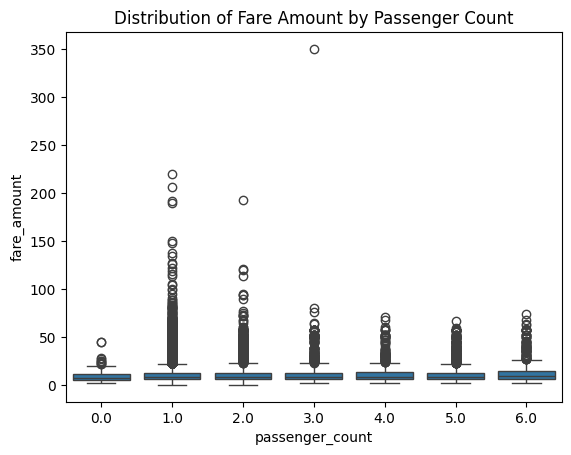

In [162]:
# Distribution of Fare Amount by Passenger Count
sns.boxplot(x="passenger_count", y="fare_amount", data=df)
plt.title("Distribution of Fare Amount by Passenger Count")
plt.show()

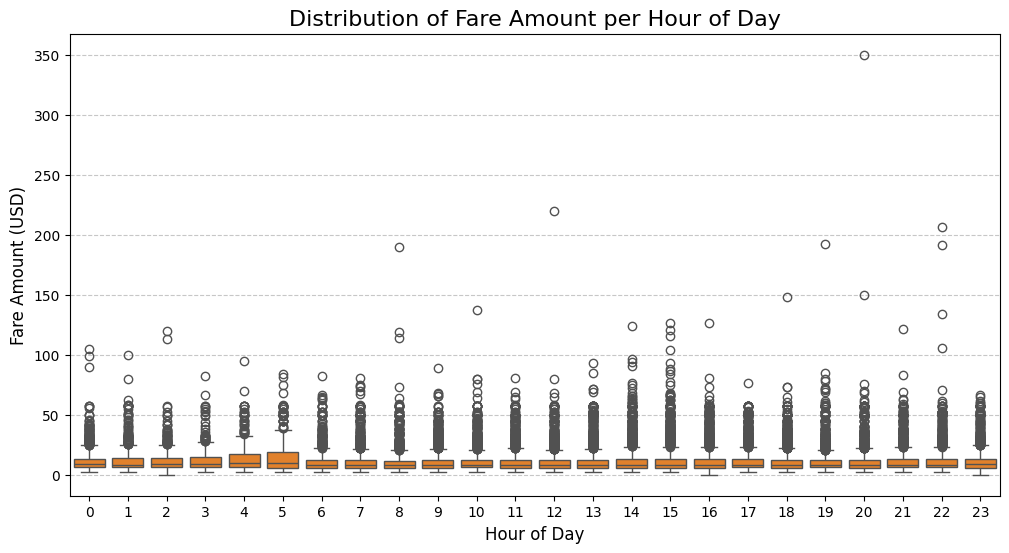

In [163]:
# Distribution of Fare Amount per Hour of Day
df['hour'] = df['pickup_datetime'].dt.hour
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='fare_amount', data=df, color="#ff7f0e")
plt.title("Distribution of Fare Amount per Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


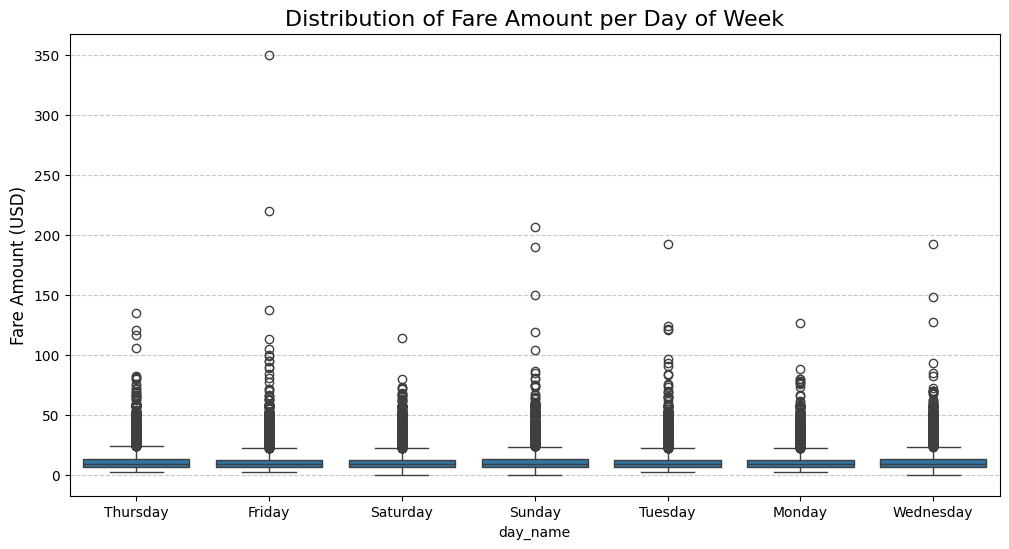

In [164]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
# Map numbers to names for better readability
day_names = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
             4: "Friday", 5: "Saturday", 6: "Sunday"}
df['day_name'] = df['day_of_week'].map(day_names)

# Boxplot: Fare Amount per Day of Week
plt.figure(figsize=(12,6))
sns.boxplot(x='day_name', y='fare_amount', data=df)
plt.title("Distribution of Fare Amount per Day of Week", fontsize=16)
plt.ylabel("Fare Amount (USD)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2.7 Correlation Matrix and Heatmap


In [165]:
df_encoded = df.copy()

# Drop useless columns
df_encoded = df_encoded.drop(columns=['key', 'Unnamed: 0'])

# Convert datetime into numeric features
df_encoded['pickup_datetime'] = pd.to_datetime(df_encoded['pickup_datetime'], errors='coerce')
df_encoded['hour'] = df_encoded['pickup_datetime'].dt.hour
df_encoded['day_of_week'] = df_encoded['pickup_datetime'].dt.dayofweek
# Drop any non-numeric columns 
df_encoded = df_encoded.select_dtypes(include=['number'])

In [166]:
# Correlation
corr = df_encoded.corr()

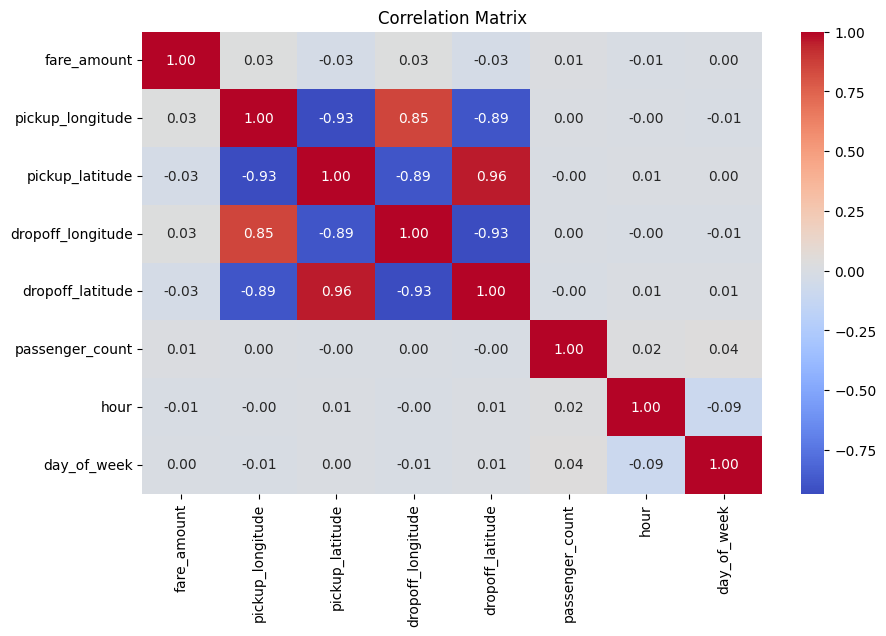

In [167]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 3. Data Preparation (for DSO1)

Objective: Properly prepare the data to build a regression model that predicts the target variable fare_amount.

In [168]:
# 1) Delete duplicates and missing values
df_clean = df_encoded.dropna().drop_duplicates().copy()

# 3) Variable cible et features
y = df_clean['fare_amount']
X = df_clean[['hour', 'day_of_week', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count']]

# 4) Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5) Prétraitement : scaling + one-hot


numeric_features = ['hour', 'day_of_week', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='drop')


# Fit & transform
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Shapes -> Train:", X_train_prep.shape, "Test:", X_test_prep.shape)


Shapes -> Train: (24667, 7) Test: (6167, 7)


# 4. Modeling (for DSO1)

# 4.1 Linear Regression

In [169]:
full_pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

full_pipeline_LR.fit(X_train, y_train)
joblib.dump(full_pipeline_LR, "LR_model.joblib")

# Predictions
y_pred_train_LR = full_pipeline_LR.predict(X_train)
y_pred_test_LR  = full_pipeline_LR.predict(X_test)

# Evaluation
r2_train_LR = r2_score(y_train, y_pred_train_LR)
r2_test_LR  = r2_score(y_test, y_pred_test_LR)
rmse_test_LR = np.sqrt(mean_squared_error(y_test, y_pred_test_LR))

print("=== Linear Regression Pipeline ===")
print("R2 Train:", r2_train_LR)
print("R2 Test :", r2_test_LR)
print("RMSE Test:", rmse_test_LR)


=== Linear Regression Pipeline ===
R2 Train: 0.0014062476407429303
R2 Test : -0.0007964222121923381
RMSE Test: 10.03390358385188


=> Similar and low R²s → LR Model is underfitting

# 4.2 Random Forest

In [170]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 0.5]
}

rf_search = RandomizedSearchCV(
    rf,
    rf_param_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_search.fit(X_train_prep, y_train)
best_rf = rf_search.best_estimator_
print("✅ Best RF Params:", rf_search.best_params_)

# --- Evaluate best RF ---
y_pred_train_RF = best_rf.predict(X_train_prep)
y_pred_test_RF  = best_rf.predict(X_test_prep)

r2_train_RF = r2_score(y_train, y_pred_train_RF)
r2_test_RF  = r2_score(y_test, y_pred_test_RF)
rmse_test_RF = np.sqrt(mean_squared_error(y_test, y_pred_test_RF))

print("\n=== Random Forest Regression ===")
print(f"R² Train: {r2_train_RF:.4f}")
print(f"R² Test : {r2_test_RF:.4f}")
print(f"RMSE Test: {rmse_test_RF:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best RF Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 20}

=== Random Forest Regression ===
R² Train: 0.8440
R² Test : 0.7272
RMSE Test: 5.2384


# 4.3 KNN

In [171]:
knn = KNeighborsRegressor()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean
}

knn_search = GridSearchCV(
    knn,
    knn_param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

knn_search.fit(X_train_prep, y_train)
best_knn = knn_search.best_estimator_
print("\n✅ Best KNN Params:", knn_search.best_params_)

# --- Evaluate best KNN ---
y_pred_train_KNN = best_knn.predict(X_train_prep)
y_pred_test_KNN  = best_knn.predict(X_test_prep)

r2_train_KNN = r2_score(y_train, y_pred_train_KNN)
r2_test_KNN  = r2_score(y_test, y_pred_test_KNN)
rmse_test_KNN = np.sqrt(mean_squared_error(y_test, y_pred_test_KNN))

print("\n=== KNN Regression ===")
print(f"R² Train: {r2_train_KNN:.4f}")
print(f"R² Test : {r2_test_KNN:.4f}")
print(f"RMSE Test: {rmse_test_KNN:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best KNN Params: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

=== KNN Regression ===
R² Train: 0.9846
R² Test : 0.3390
RMSE Test: 8.1547


# 4.4 Decision Tree

In [172]:
dt = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

dt_search = GridSearchCV(
    dt,
    dt_param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

dt_search.fit(X_train_prep, y_train)
best_dt = dt_search.best_estimator_
print(" Best Decision Tree Params:", dt_search.best_params_)

# --- Evaluate best Decision Tree ---
y_pred_train_DT = best_dt.predict(X_train_prep)
y_pred_test_DT  = best_dt.predict(X_test_prep)

r2_train_DT = r2_score(y_train, y_pred_train_DT)
r2_test_DT  = r2_score(y_test, y_pred_test_DT)
rmse_test_DT = np.sqrt(mean_squared_error(y_test, y_pred_test_DT))

print("\n=== Decision Tree Regression ===")
print(f"R² Train: {r2_train_DT:.4f}")
print(f"R² Test : {r2_test_DT:.4f}")
print(f"RMSE Test: {rmse_test_DT:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
 Best Decision Tree Params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}

=== Decision Tree Regression ===
R² Train: 0.7694
R² Test : 0.6588
RMSE Test: 5.8587


In [197]:
!pip install xgboost


  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [199]:
from xgboost import XGBRegressor

xgb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=400,
        learning_rate=0.1,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R²: {r2:.3f}")


XGBoost RMSE: 5.51
XGBoost R²: 0.698


# 5. Performance Evaluation

In [176]:
results = pd.DataFrame({
    "Models": ["Linear Regression", "Random Forest", "KNN Regressor", "Decision Tree"],
    "R² Train": [r2_train_LR, r2_train_RF, r2_train_KNN, r2_train_DT],
    "R² Test":  [r2_test_LR, r2_test_RF, r2_test_KNN, r2_test_DT],
    "RMSE Test": [rmse_test_LR, rmse_test_RF, rmse_test_KNN, rmse_test_DT]
})

print("\n=== Model Comparison ===")
print(results)


=== Model Comparison ===
              Models  R² Train   R² Test  RMSE Test
0  Linear Regression  0.001406 -0.000796  10.033904
1      Random Forest  0.843950  0.727222   5.238439
2      KNN Regressor  0.984584  0.338965   8.154725
3      Decision Tree  0.769366  0.658798   5.858725


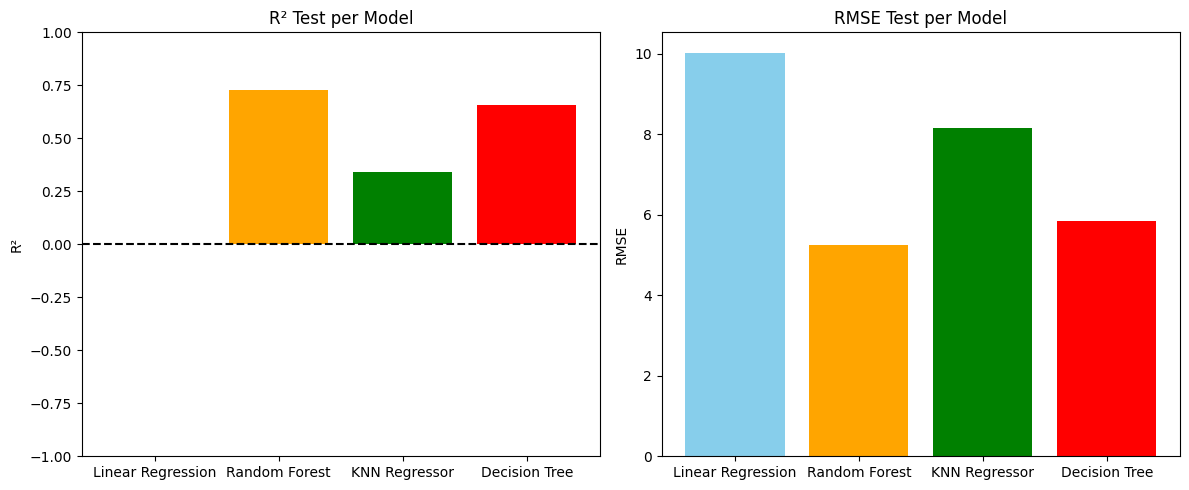

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Bar plot R² Test
ax[0].bar(results['Models'], results['R² Test'], color=['skyblue','orange','green','red'])
ax[0].set_title('R² Test per Model')
ax[0].set_ylim(-1,1)
ax[0].axhline(0, color='black', linestyle='--')
ax[0].set_ylabel('R²')

# Bar plot RMSE Test
ax[1].bar(results['Models'], results['RMSE Test'], color=['skyblue','orange','green','red'])
ax[1].set_title('RMSE Test per Model')
ax[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

Best Model: Random Forest:

Highest R² Test (0.727) → explains the most variance on unseen data.

Lowest RMSE (5.24) → smallest prediction error.

Moderate Train–Test gap (0.84 → 0.73) → good generalization

# 6. Modeling (DSO2) Unsupervised

# 6.1 Data preparation

In [228]:
# Load dataset
data = df_encoded.drop_duplicates().copy()

# Features
num_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 
                'dropoff_longitude', 'dropoff_latitude','hour','day_of_week']

# Target
target = 'fare_amount'

# Imputers using the mean method
num_imputer = SimpleImputer(strategy='mean')


# Preprocessing: combine imputer + scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_features)
    ]
)

# Fit and transform
X = preprocessor.fit_transform(data[num_features])
y = data[target].values

# Save preprocessor
joblib.dump(preprocessor, 'uber_preprocessor.joblib')
print("Preprocessor saved successfully")

Preprocessor saved successfully


# 6.2 PCA (2D)

In [229]:
# Drop missing values
df_clean = df_encoded.dropna().copy()

# Drop target column before PCA (fare_amount)
df_clean_pca = df_clean.drop(columns=['fare_amount']).copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean_pca)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance ratio: [0.52902975 0.1562391 ]
Number of components selected: 2


In [230]:
explained_variance = pca.explained_variance_ratio_
total_explained = explained_variance.sum()
print(f"Explained variance by PC1: {explained_variance[0]:.4f}")
print(f"Explained variance by PC2: {explained_variance[1]:.4f}")
print(f"Total explained variance (2D): {total_explained:.4f}")

Explained variance by PC1: 0.5290
Explained variance by PC2: 0.1562
Total explained variance (2D): 0.6853


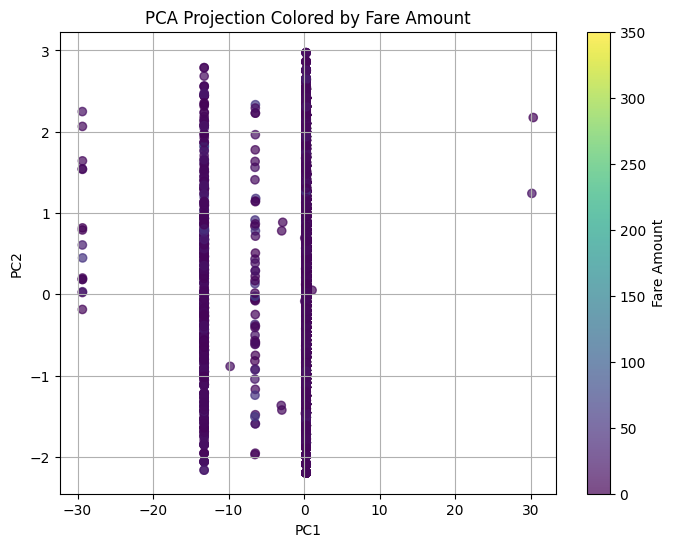

In [231]:
plt.figure(figsize=(8,6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                 c=df_clean['fare_amount'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Fare Amount')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Colored by Fare Amount')
plt.grid(True)
plt.show()

In [232]:
features_used = df_clean_pca.columns[:pca.n_features_in_]

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features_used
)

print("Corrélations variables - composantes principales :")
print(loadings)

Corrélations variables - composantes principales :
                        PC1       PC2
pickup_longitude  -0.491052 -0.002143
pickup_latitude    0.508306 -0.005772
dropoff_longitude -0.491815 -0.002083
dropoff_latitude   0.508457 -0.003191
passenger_count   -0.001967  0.145591
hour               0.004201 -0.678642
day_of_week        0.007803  0.719858


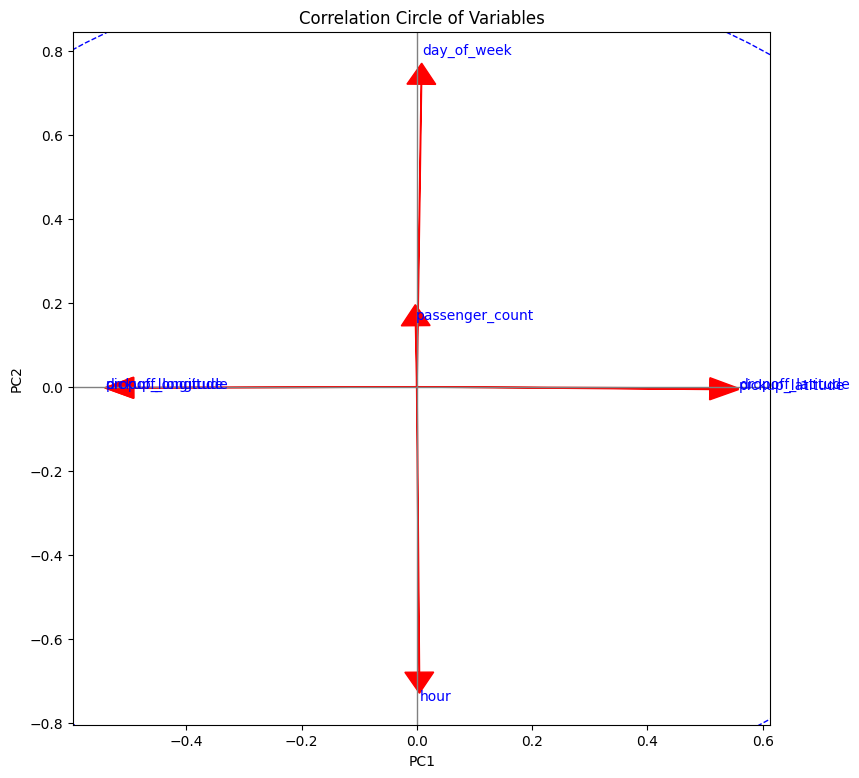

In [233]:
plt.figure(figsize=(9,9))
plt.axhline(0, color="grey", lw=1)
plt.axvline(0, color="grey", lw=1)

for i in loadings.index:
    plt.arrow(0, 0, loadings.loc[i, "PC1"], loadings.loc[i, "PC2"], 
              head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(loadings.loc[i, "PC1"]*1.1, loadings.loc[i, "PC2"]*1.1, i, color='b')

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Correlation Circle of Variables")
plt.show()

# 6.3 Determining the Optimal Number of Clusters for the Reduced Dataset

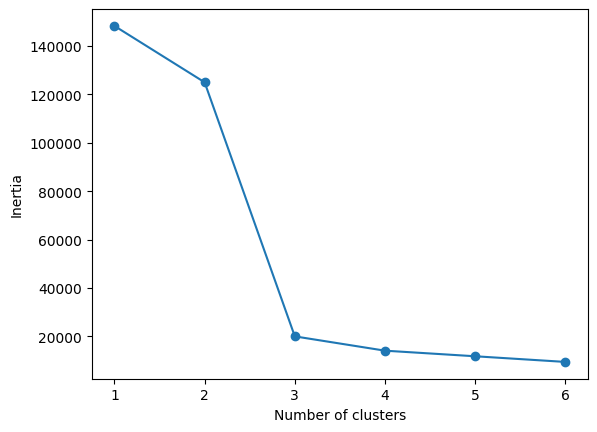

In [234]:
X_preprocessed = preprocessor.fit_transform(data)
inertia = []
for k in range(1, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

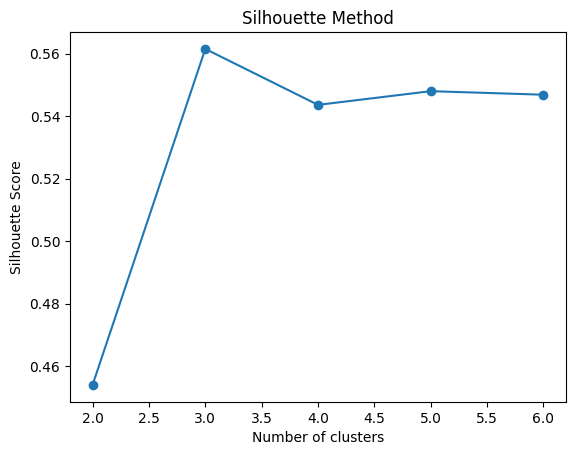

{2: np.float64(0.4539375577501636), 3: np.float64(0.5615386799037775), 4: np.float64(0.543622085495508), 5: np.float64(0.5480101602370939), 6: np.float64(0.5468742209309622)}


In [235]:

scores = []
K = range(2, 7)  # silhouette isn't defined for k=1
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    scores.append(silhouette_score(X_pca, labels))

plt.plot(K, scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

print(dict(zip(K, scores)))

Conclusion

Best number of clusters: k = 3
Silhouette score is highest.

# 6.4 Training the KMeans Model using the best K

In [236]:
best_k = 3

# Use only numeric features for preprocessing
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=2)),
    ("kmeans", KMeans(n_clusters=best_k, random_state=42))
])

# Fit and predict clusters
clusters = pipeline.fit_predict(data[num_features])

# Add cluster labels to original data
data['cluster'] = clusters

# 6.5 Analyse the clusters 


Average profile of clusters:
         passenger_count  pickup_longitude  pickup_latitude  \
cluster                                                       
0                   1.63            -73.99            40.75   
1                   1.69             -1.74            -0.34   
2                   1.71            -73.96            40.75   

         dropoff_longitude  dropoff_latitude  fare_amount  
cluster                                                    
0                   -74.00             40.74        11.28  
1                    -2.03              0.12        13.63  
2                   -73.96             40.75        11.46  


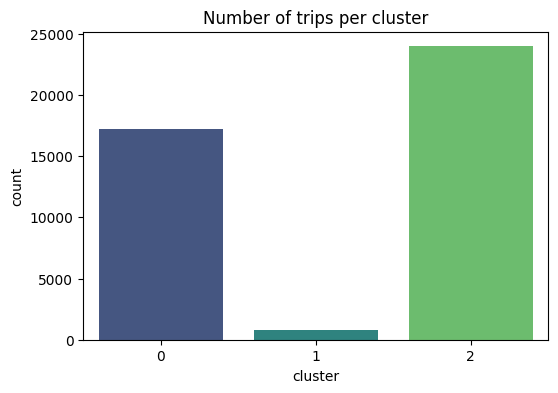

In [237]:
# Example cluster profiling for Uber dataset
cluster_profile = data.groupby('cluster').agg({
    'passenger_count': 'mean',
    'pickup_longitude': 'mean',
    'pickup_latitude': 'mean',
    'dropoff_longitude': 'mean',
    'dropoff_latitude': 'mean',
    'fare_amount': 'mean'
}).round(2)

print("\nAverage profile of clusters:")
print(cluster_profile)

# Visualize number of points per cluster
plt.figure(figsize=(6,4))
sns.countplot(x='cluster', data=data, palette='viridis')
plt.title("Number of trips per cluster")
plt.show()

# 6.6 PCA Visualization (2D visualization)

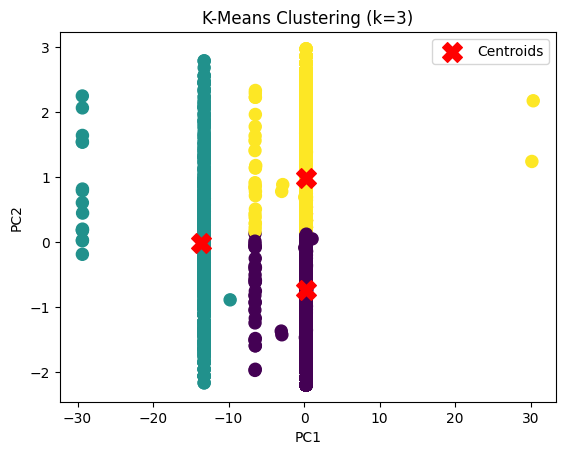

In [239]:
best_k = 3
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=75)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={best_k})')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# DSO4. Classification


In [200]:
# === Classification Pipeline (Uber fares) ===


pd.set_option('display.max_columns', None)


df_raw = pd.read_csv("datauber.csv")

print('Loaded data with shape:', df_raw.shape)
df_raw.head()



Loaded data with shape: (44377, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199.0,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355.0,2009-08-24 21:45:00.00000061,12.9,NaN,-74.005043,40.740770,NaN,40.772647,1.0
3,25894730.0,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,NaN,-73.965316,40.803349,3.0
4,17610152.0,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,NaN,40.744085,-73.973082,NaN,5.0


In [201]:

# --- Basic cleaning similar to common Uber fare datasets ---
df = df_raw.copy()

# Standardize column names if needed
df.columns = [c.strip() for c in df.columns]

# Drop clearly invalid fares and passenger counts where possible
if 'fare_amount' in df.columns:
    df = df[(df['fare_amount'].notna()) & (df['fare_amount'] > 0) & (df['fare_amount'] < 500)]
if 'passenger_count' in df.columns:
    df = df[(df['passenger_count'].fillna(1) > 0) & (df['passenger_count'].fillna(1) <= 8)]

# Parse datetime
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce', utc=True)
    df = df[df['pickup_datetime'].notna()]
    df['hour'] = df['pickup_datetime'].dt.hour
    df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
    df['month'] = df['pickup_datetime'].dt.month
else:
    # If no datetime present, create dummy time features
    df['hour'] = 0
    df['dayofweek'] = 0
    df['month'] = 0

# Haversine distance
def haversine_vectorized(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

if set(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']).issubset(df.columns):
    # Remove absurd coordinates (very rough NYC-ish bounds, but lenient)
    lat_bounds = (df['pickup_latitude'].between(-90, 90)) & (df['dropoff_latitude'].between(-90, 90))
    lon_bounds = (df['pickup_longitude'].between(-180, 180)) & (df['dropoff_longitude'].between(-180, 180))
    df = df[lat_bounds & lon_bounds]

    df['trip_km'] = haversine_vectorized(
        df['pickup_latitude'], df['pickup_longitude'],
        df['dropoff_latitude'], df['dropoff_longitude']
    )
    # Filter impossible distances
    df = df[(df['trip_km'] >= 0) & (df['trip_km'] < 200)]
else:
    df['trip_km'] = np.nan

# Keep minimal required columns
keep_cols = [c for c in ['fare_amount','passenger_count','hour','dayofweek','month','trip_km']
             if c in df.columns]
df = df[keep_cols].dropna()

print('After cleaning:', df.shape)
df.describe()


After cleaning: (30764, 6)


,fare_amount,passenger_count,hour,dayofweek,month,trip_km
count,30764.000000,30764.000000,30764.000000,30764.000000,30764.000000,30764.000000
mean,11.414387,1.686777,13.461774,3.048011,6.270478,3.306209
std,10.239503,1.300229,6.522045,1.950981,3.434994,4.116457
min,0.010000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,9.000000,1.000000,3.000000,1.213144
50%,8.500000,1.000000,14.000000,3.000000,6.000000,2.118868
75%,12.500000,2.000000,19.000000,5.000000,9.000000,3.880776
max,350.000000,6.000000,23.000000,6.000000,12.000000,177.995633


In [202]:

# --- Create quantile-based fare classes ---
y_cont = df['fare_amount'].astype(float)

# Use quantiles to split into 3 roughly equal groups
q = y_cont.quantile([0.33, 0.66]).values
q1, q2 = q[0], q[1]

def label_fare(v):
    if v <= q1:
        return 'low'
    elif v <= q2:
        return 'mid'
    else:
        return 'high'

y_cls = y_cont.apply(label_fare)

# Features exclude the original fare
X = df.drop(columns=['fare_amount'])

print('Class balance:\n', y_cls.value_counts(normalize=True).round(3))
X.head()


Class balance:
 fare_amount
high    0.336
low     0.335
mid     0.329
Name: proportion, dtype: float64


,passenger_count,hour,dayofweek,month,trip_km
0,1.0,19,3,5,1.683323
1,1.0,20,4,7,2.457590
5,1.0,2,5,2,0.000000
7,1.0,13,1,12,0.000000
8,1.0,9,4,2,2.332711


In [203]:

# --- Train/test split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

num_features = X.columns.tolist()

# Preprocess: scale numeric features for linear model; trees are robust either way.
preprocess = ColumnTransformer(
    transformers=[('num', StandardScaler(with_mean=True, with_std=True), num_features)],
    remainder='drop'
)


In [214]:
# --- Define models ---
models = {
    'LogisticRegression': Pipeline([
        ('prep', preprocess),
        ('clf', LogisticRegression(max_iter=1000, n_jobs=None))
    ]),
    'RandomForest': Pipeline([
        ('prep', preprocess),  # harmless for trees here
        ('clf', RandomForestClassifier(n_estimators=250, random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('prep', preprocess),
        ('clf', GradientBoostingClassifier(random_state=42))
    ])
}

results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1m = f1_score(y_test, preds, average='macro')
    results[name] = {'accuracy': acc, 'macro_f1': f1m, 'preds': preds}
    print(f"{name}: accuracy={acc:.3f} macro-F1={f1m:.3f}")


LogisticRegression: accuracy=0.746 macro-F1=0.746
RandomForest: accuracy=0.728 macro-F1=0.728
GradientBoosting: accuracy=0.747 macro-F1=0.747


In [216]:
from sklearn.metrics import classification_report
# --- Detailed classification reports ---
for name, res in results.items():
    print('\n' + '='*70)
    print(name)
    print(classification_report(y_test, res['preds'], digits=3))



LogisticRegression
              precision    recall  f1-score   support

        high      0.871     0.761     0.812      2067
         low      0.731     0.839     0.781      2061
         mid      0.652     0.638     0.645      2025

    accuracy                          0.746      6153
   macro avg      0.751     0.746     0.746      6153
weighted avg      0.752     0.746     0.747      6153


RandomForest
              precision    recall  f1-score   support

        high      0.827     0.774     0.799      2067
         low      0.742     0.784     0.762      2061
         mid      0.620     0.625     0.622      2025

    accuracy                          0.728      6153
   macro avg      0.730     0.727     0.728      6153
weighted avg      0.730     0.728     0.729      6153


GradientBoosting
              precision    recall  f1-score   support

        high      0.868     0.769     0.815      2067
         low      0.737     0.817     0.775      2061
         mid      0.649

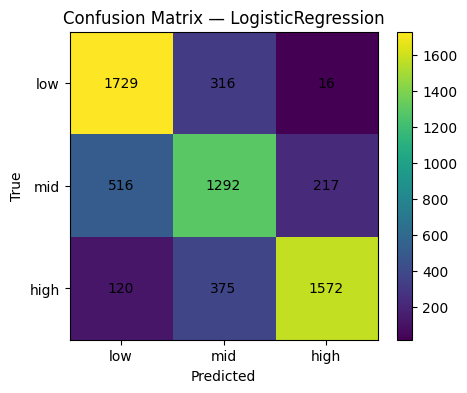

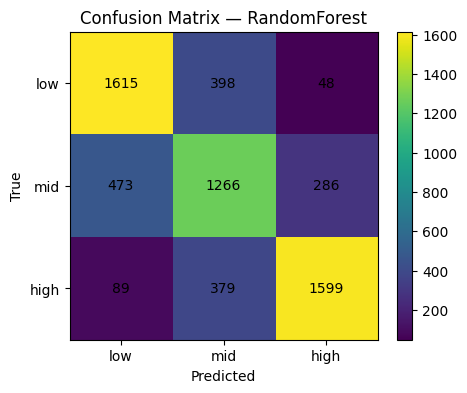

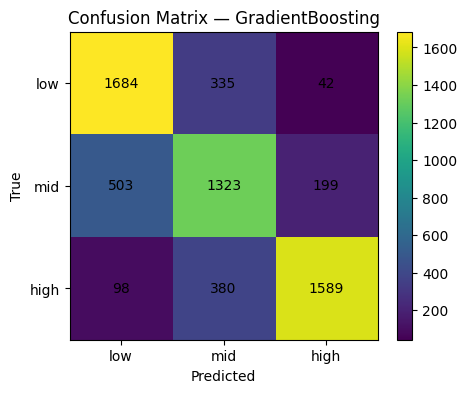

In [218]:
from sklearn.metrics import confusion_matrix

# --- Confusion matrices ---
labels = ['low','mid','high']
for name, res in results.items():
    cm = confusion_matrix(y_test, res['preds'], labels=labels)
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(f'Confusion Matrix — {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')
    fig.colorbar(im, ax=ax)
    plt.show()


# Deployement Setup Flask

In [219]:
# STEP 1: Train (or reuse) and SAVE models for Flask

import os, joblib, numpy as np, pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# 1) Load data (from your ML_Project folder)
df = pd.read_csv("datauber.csv")

# 2) Clean + features (kept minimal and consistent for deployment)
df.columns = df.columns.str.strip()
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")
df = df.dropna(subset=["pickup_datetime"])
df = df[(df["fare_amount"].notna()) & (df["fare_amount"] > 0) & (df["fare_amount"] < 500)]
df = df[(df["passenger_count"].fillna(1) > 0) & (df["passenger_count"].fillna(1) <= 8)]

# Haversine distance (km)
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371.0 * c

df["hour"] = df["pickup_datetime"].dt.hour
df["dayofweek"] = df["pickup_datetime"].dt.dayofweek
df["month"] = df["pickup_datetime"].dt.month
df["trip_km"] = haversine_km(
    df["pickup_latitude"], df["pickup_longitude"],
    df["dropoff_latitude"], df["dropoff_longitude"]
)

features = ["passenger_count", "hour", "dayofweek", "month", "trip_km"]
df = df.dropna(subset=features + ["fare_amount"])

X = df[features].copy()
y_reg = df["fare_amount"].astype(float)

# Classification labels (balanced quantiles: low/mid/high)
q1, q2 = y_reg.quantile([0.33, 0.66])
y_cls = y_reg.apply(lambda v: "low" if v <= q1 else ("mid" if v <= q2 else "high"))

# 3) Simple pipelines
prep = ColumnTransformer([("num", StandardScaler(), features)], remainder="drop")

regression_pipe = Pipeline([
    ("prep", prep),
    ("rf", RandomForestRegressor(n_estimators=250, random_state=42))
])

classifier_pipe = Pipeline([
    ("prep", prep),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

# 4) Fit (quick fit; no need to print metrics here)
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(X, y_reg, test_size=0.2, random_state=42)
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(X, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

regression_pipe.fit(Xr_tr, yr_tr)
classifier_pipe.fit(Xc_tr, yc_tr)

# 5) Save to models/
Path("models").mkdir(exist_ok=True)
joblib.dump(regression_pipe, "models/uber_regression.pkl")
joblib.dump(classifier_pipe, "models/uber_classifier.pkl")
print("✅ Saved: models/uber_regression.pkl  and  models/uber_classifier.pkl")
print("Features used:", features)


✅ Saved: models/uber_regression.pkl  and  models/uber_classifier.pkl
Features used: ['passenger_count', 'hour', 'dayofweek', 'month', 'trip_km']
